In [2]:
import torch
from torch import nn

# Set random seed
torch.manual_seed(42)

# إنشاء البيانات (يجب أن يكون بعد استيراد torch)
weight = 0.7
bias = 0.3
start = 0    
end = 1 
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

# تقسيم البيانات
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Define model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# Initialize model
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))

# Example test prediction
with torch.inference_mode():
    y_preds = model_0(x_test)

# Loss function & optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Training loop
epochs = 1000  # زيادة عدد epochs لنتائج أفضل
for epoch in range(epochs):
    model_0.train()
    
    # Forward pass
    y_pred = model_0(x_train)
    loss = loss_fn(y_pred, y_train)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:  # طباعة كل 10 epochs
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# التحقق من النتائج النهائية
print(f"\nTrue weight: {weight}, Learned weight: {model_0.weights.item():.4f}")
print(f"True bias: {bias}, Learned bias: {model_0.bias.item():.4f}")

torch.Size([40, 1]) torch.Size([40, 1]) torch.Size([10, 1]) torch.Size([10, 1])
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
Epoch 0: Loss = 0.3129
Epoch 10: Loss = 0.1977
Epoch 20: Loss = 0.0891
Epoch 30: Loss = 0.0531
Epoch 40: Loss = 0.0454
Epoch 50: Loss = 0.0417
Epoch 60: Loss = 0.0382
Epoch 70: Loss = 0.0348
Epoch 80: Loss = 0.0313
Epoch 90: Loss = 0.0279
Epoch 100: Loss = 0.0245
Epoch 110: Loss = 0.0210
Epoch 120: Loss = 0.0176
Epoch 130: Loss = 0.0142
Epoch 140: Loss = 0.0107
Epoch 150: Loss = 0.0073
Epoch 160: Loss = 0.0039
Epoch 170: Loss = 0.0089
Epoch 180: Loss = 0.0089
Epoch 190: Loss = 0.0089
Epoch 200: Loss = 0.0089
Epoch 210: Loss = 0.0089
Epoch 220: Loss = 0.0089
Epoch 230: Loss = 0.0089
Epoch 240: Loss = 0.0089
Epoch 250: Loss = 0.0089
Epoch 260: Loss = 0.0089
Epoch 270: Loss = 0.0089
Epoch 280: Loss = 0.0089
Epoch 290: Loss = 0.0089
Epoch 300: Loss = 0.0089
Epoch 310: Loss = 0.0089
Epoch 320:

In [3]:
with torch.inference_mode():
    y_n=model_0(x_test)

In [4]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [5]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predections=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Train data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")
    if predections is not None:
        plt.scatter(test_data,predections,c="r",s=4,label="Predictions")   
    plt.legend()
    plt.show()

    


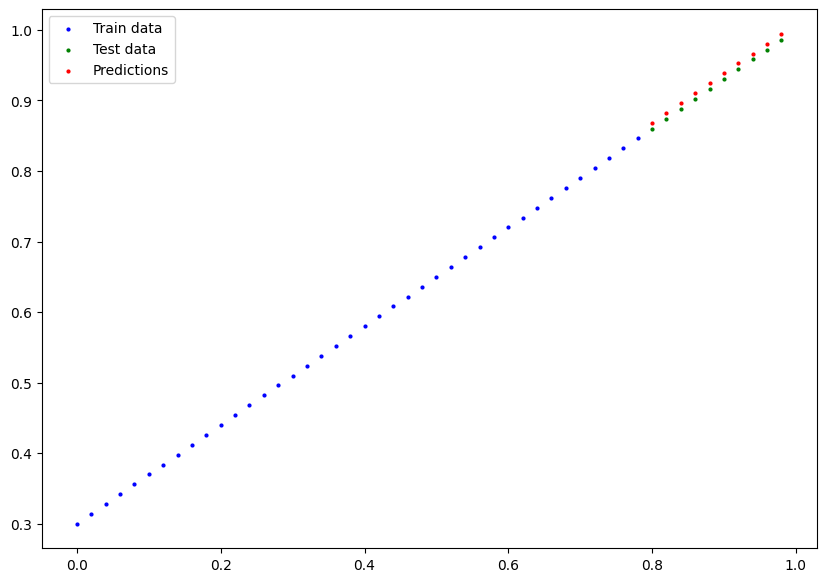

In [6]:
plot_predictions(predections=y_n)

In [7]:
model_0.eval()
with torch.inference_mode():
    test_pred=model_0(x_test)
    test_loss=loss_fn(test_pred,y_test)
    if epoch % 10 == 0:
        print(f"Test loss: {test_loss:.4f}")

In [8]:
from pathlib import Path 
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="01_pytorch_workflow_model_0.pth"
model_save_path=model_path/model_name
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_0.state_dict(),f=model_save_path)

Saving model to: models\01_pytorch_workflow_model_0.pth


In [9]:
loaded_model=LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=model_save_path))
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [10]:
device="cuda" if torch.cuda.is_available() else "cpu"

weight=0.7
bias=0.3
start=0
end=1
step=0.02
x= torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [11]:
#split data
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]

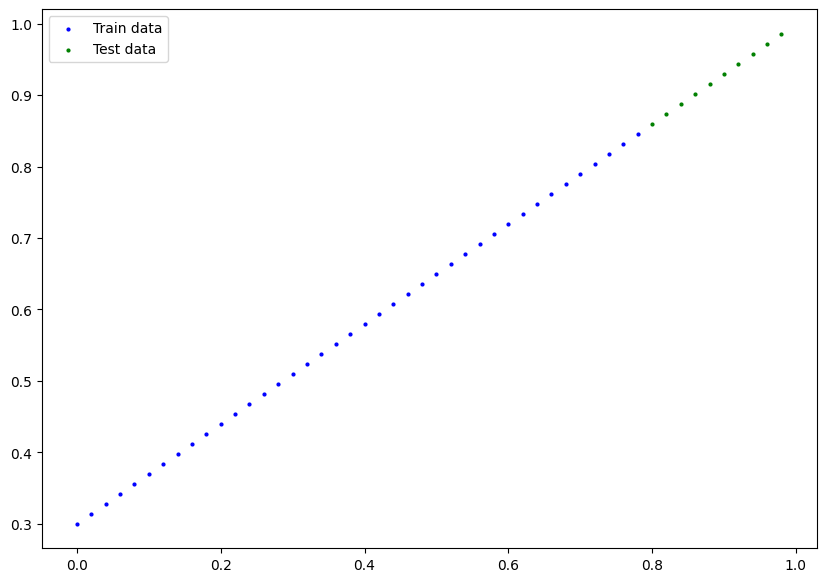

In [12]:
plot_predictions(x_train,y_train,x_test,y_test)

In [13]:
class LinearRegressionModelv2(nn.Module):
    def __init__ (self):
        super().__init__()
        self.liner_layer=nn.Linear(in_features=1,out_features=1)
        def forward(self,x: torch.Tensor)->torch.Tensor:
            return self.linear_layer(x)
torch.manual_seed(42)
model_1=LinearRegressionModelv2()
model_1.state_dict()


OrderedDict([('liner_layer.weight', tensor([[0.7645]])),
             ('liner_layer.bias', tensor([0.8300]))])

In [14]:
next(model_1.parameters())

Parameter containing:
tensor([[0.7645]], requires_grad=True)

In [15]:
model_1.to(device)

LinearRegressionModelv2(
  (liner_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [16]:
weight=0.7
bias=0.3
start=0
end=1
step=0.002
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
class LinearRegressionModelv3(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer=nn.Linear(in_features=1,out_features=1)
    def forward(self,x:torch.Tensor)->torch.Tensor:
            return self.linear_layer(x)
model_02=LinearRegressionModelv3()
torch.manual_seed(42)
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_02.parameters(),lr=0.01 )
epochs=100
for epoch in range(epochs):
    model_02.train()
    y_pred=model_02(x_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
model_02.eval()
with torch.inference_mode():
    test_pred=model_02(x_test)
    test_loss=loss_fn(test_pred,y_test)

if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss}")   
print(f"\nTrue weight: {weight}, Learned weight: {model_02.linear_layer.weight.item():.4f}")
print(f"True bias: {bias}, Learned bias: {model_02.linear_layer.bias.item():.4f}")  
model_02.state_dict()



True weight: 0.7, Learned weight: -0.1496
True bias: 0.3, Learned bias: 0.6715


OrderedDict([('linear_layer.weight', tensor([[-0.1496]])),
             ('linear_layer.bias', tensor([0.6715]))])

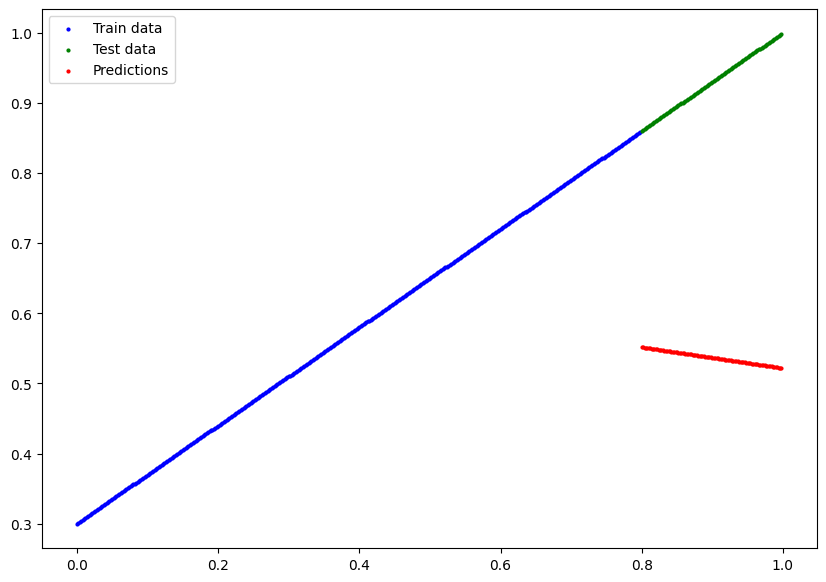

In [17]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predections=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Train data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")
    if predections is not None:
        plt.scatter(test_data,predections,c="r",s=4,label="Predictions")   
    plt.legend()
    plt.show()

plot_predictions(predections=test_pred.detach().cpu().numpy())



In [18]:
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="01_pytorch_workflow_model_02.pth" 
model_save_path=model_path/model_name
print(f"Saving model to: {model_save_path}")  
torch.save(obj=model_02.state_dict(),f=model_save_path)

Saving model to: models\01_pytorch_workflow_model_02.pth


In [19]:
loaded_model=LinearRegressionModelv3()
loaded_model.load_state_dict(torch.load(f=model_save_path))
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.1496]])),
             ('linear_layer.bias', tensor([0.6715]))])

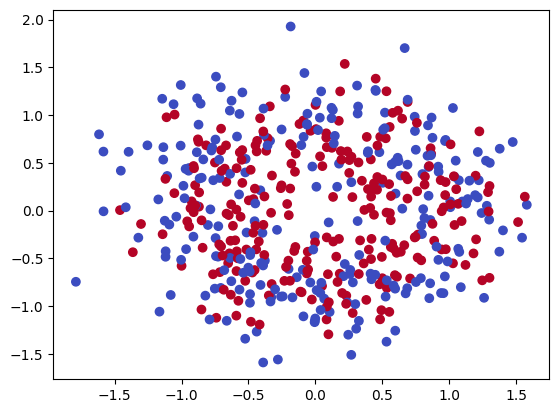

In [20]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=500, noise=0.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.show()


In [21]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000
X, y =make_circles(n_samples,noise=0.03,random_state=42)



In [22]:
len(X),len(y)
print(f"first 5 samples of X : {X[:5]  } first samples of y : {y[:5]}")

first 5 samples of X : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] first samples of y : [1 1 1 1 0]


In [23]:
import pandas as pd 
circles = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


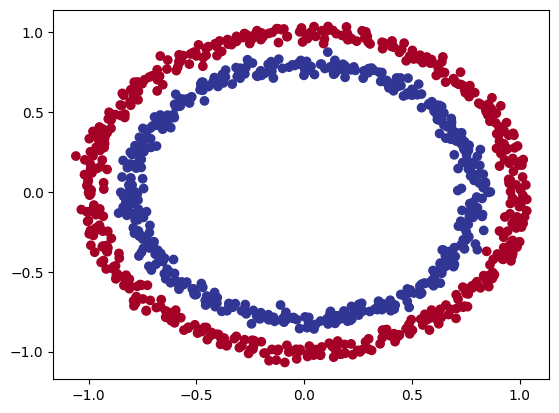

In [24]:
import matplotlib.pyplot as plt 
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [25]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
len(X),len(y)
print(f"first 5 samples of X : {X[:5]  } first samples of y : {y[:5]}")

first 5 samples of X : tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) first samples of y : tensor([1., 1., 1., 1., 0.])


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
import torch 
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [28]:
class circles (nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_01=nn.Linear(in_features=2,out_features=5)
        self.layer_02=nn.Linear(in_features=5,out_features=1)
    def forward(self,x):
        return self.layer_02(self.layer_01(X))
model_circles=circles().to(device)
        

In [29]:
model_03=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)     
    
)
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_03.parameters(),lr=0.1)  

In [30]:
!nvidia-smi

Sat Oct 11 15:26:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.28                 Driver Version: 576.28         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   53C    P5              6W /  125W |     486MiB /   6141MiB |     56%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [71]:
#setup the loss function 
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_03.parameters(),lr=0.1)
#calculate accuracy 
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=correct/len(y_pred)*100
    return acc
accuracy_fn(y_true=torch.tensor([1,0,1,1,0]),y_pred=torch.tensor([1,0,0,1,1]))
model_03.eval()
with torch.inference_mode():
    y_logits=model_03(X_test)[:5]
#y_logits
#use the sigmoid function to convert our model logits into prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
#print(f'this is y_pred {y_pred_probs}')
#find the predicted labels
y_preds=torch.round(y_pred_probs)
#print(f'this is y_preds {y_preds}')
#in full (logits -> pred probs -> preds labels)
y_pred_labels=torch.round(torch.sigmoid(model_03(X_test)))[:5]
#print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
#get rid of extra dimension 
y_preds.squeeze()
#build a training loop for model_03
torch.manual_seed(42)
epochs=1000
for epoch in range (epochs):
    model_03.train()
    y_logits=model_03(X_train).squeeze()
    y_pred=torch.round (torch.sigmoid(y_logits))
    #calculate the loss and accuracy
    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train,y_pred=y_pred)
    #optimizer
    optimizer.zero_grad()
    #backward pass
    loss.backward()
    optimizer.step()
#testing
    model_03.eval()
    with torch.inference_mode():
     test_logits=model_03(X_test).squeeze()
     test_pred=torch.round(torch.sigmoid(test_logits))
    #calculate loss and accuracy
     test_loss=loss_fn(test_logits,y_test)
     test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")
 


Epoch: 0 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 10 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 20 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 30 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 40 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 50 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 60 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 70 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 80 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 90 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 100 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 110 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 120 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.0

In [54]:
#setup the loss function 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_03.parameters(), lr=0.1)

#calculate accuracy 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_pred) * 100
    return acc

# initial test
accuracy_fn(y_true=torch.tensor([1,0,1,1,0]), y_pred=torch.tensor([1,0,0,1,1]))

model_03.eval()
with torch.inference_mode():
    y_logits = model_03(X_test)[:5]

# use the sigmoid function to convert logits into probabilities
y_pred_probs = torch.sigmoid(y_logits)
print(f'this is y_pred {y_pred_probs}')

# find the predicted labels
y_preds = torch.round(y_pred_probs)
print(f'this is y_preds {y_preds}')

# full pipeline (logits -> probs -> labels)
y_pred_labels = torch.round(torch.sigmoid(model_03(X_test)))[:5]
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension 
y_preds.squeeze()

# build a training loop for model_03
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    model_03.train()
    y_logits = model_03(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # calculate the loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # optimizer
    optimizer.zero_grad()
    # backward pass
    loss.backward()
    optimizer.step()

    # ✅ اطبع داخل الحلقة كل 10 دورات
    if epoch % 10 == 0:
        model_03.eval()
        with torch.inference_mode():
            test_logits = model_03(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))
            test_loss = loss_fn(test_logits, y_test)
            test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


this is y_pred tensor([[0.5070],
        [0.5129],
        [0.4920],
        [0.5113],
        [0.4928]])
this is y_preds tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.]])
tensor([True, True, True, True, True])
Epoch: 0 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 10 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 20 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 30 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 40 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 50 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 60 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 70 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 80 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%
Epoch: 90 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.6947, Test Acc: 46.00%

In [74]:
import requests 
from pathlib import Path 
if Path ("helper_function.py").is_file():
    print("helper_function.py already exists")
else:
    print("downloading helper_function.py")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn

downloading helper_function.py


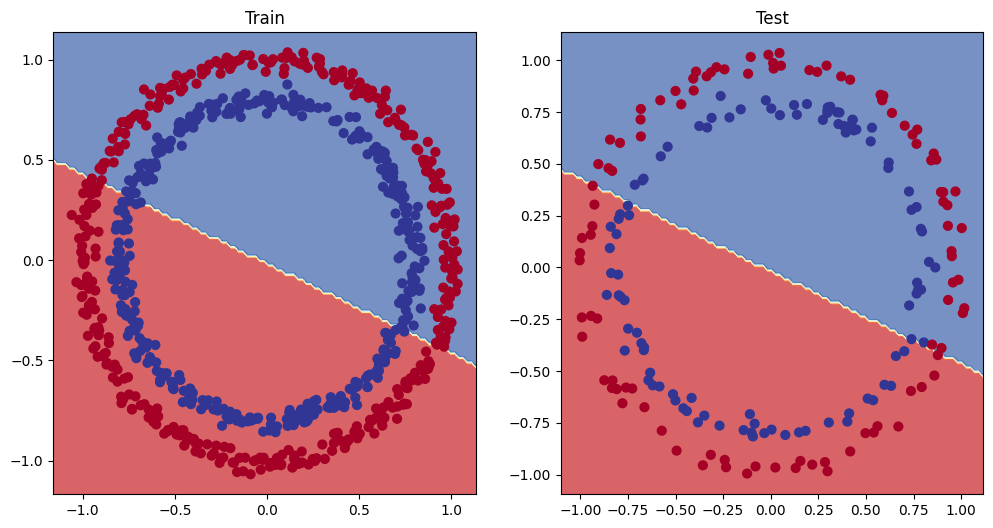

In [78]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_03,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_03,X_test,y_test)